# Week 1: Getting Started with Jupyter Notebooks

In this notebook, we will make sure all the packages required for this course are properly installed and working. 

To use this notebook, select the input cells (shown as `In [x]`) in order and press Shift-Enter to execute the code. 

Your installation is properly working if none of the cells below return any errors.

## Loading Required Packages

The first thing you normally want to do in any project is to import all the required packages. For this course, the main packages we will be using as MatPlotLib, NumPy, Pandas, and SciKit-Learn.

### MatPlotLib

First we will load MatPlotLib, a 2D plotting library, and run `%matplotlib inline`. This magic function (functions beginning with the % symbol are called magic functions) will display any plots inline in the notebook.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

### Numpy
Now, we will import NumPy. NumPy is a linear algebra library, and provides useful vector and matrix functionality, similar to MATLAB. It is convention to define NumPy as `np` for the sake of brevity:

In [14]:
import numpy as np

### Pandas
Let's now import Pandas. This library provides R-style dataframe functionality. Like NumPy, it is convention to import the Pandas library as `pd` for brevity.

In [15]:
import pandas as pd

### SciKit-Learn
Last but not least, we shall import some modules from SciKit-Learn. SciKit-Learn is the main machine learning library for Python. It is a large library and is not normally loaded directly; in general you load modules from the main library. Here we will load the `datasets` module and `svm` Support Vector Machine module:

In [17]:
from sklearn import datasets
from sklearn import svm

In [10]:
n = np.random.rand(10,1)

In [11]:
n

array([[ 0.25300778],
       [ 0.27510245],
       [ 0.78408713],
       [ 0.80365746],
       [ 0.78560733],
       [ 0.76417109],
       [ 0.49633194],
       [ 0.34233513],
       [ 0.06388708],
       [ 0.21190267]])

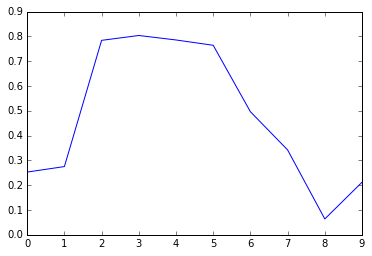

In [12]:
plt.plot(n)